In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

# Question 2

# part2

In [3]:
def calc_hist(image): # Only for one channel
    '''
    Do not use libraries
    calculate image histogram
    input(s):
      image (ndarray): input image
    output(s):
      hist (ndarray): computed input image histogram
    '''
    hist = np.zeros(256, dtype=int) # Unnecessary

    #######################
    hist, bins = np.histogram(image, bins=256, range=(0, 256))
    #######################

    return hist, bins

In [4]:
def calc_cdf(channel):
  '''
    Do not use libraries
    calculate image cdf
    input(s):
      channel (ndarray): input image channel
    output(s):
      cdf (ndarray): computed cdf for input image channel
  '''

  #######################
  cdf = np.cumsum(calc_hist(channel)[0]).astype(float)
  #######################

  return cdf

In [23]:
def hist_matching(src_image,ref_image):
  '''
  don't use libraries
  input(s):
    src_image (ndarray): source image
    ref_image (ndarray): reference image
  output(s):
    output_image (ndarray): transformation of source image so that its histogram matches histogram of refrence image
  '''
  output_image = src_image.copy()
  channels = [(0, 'Blue channel'), (1, 'Green channel'), (2, 'Red channel')]
  for channel, title in channels:
      # Getting data of specified channel and flattening it
      out_channel_data = output_image[:,:,channel].ravel()
      ref_channel_data = ref_image[:,:,channel].ravel()

      # Calculating histogram of reference image's histogram mainly for its bins
      _, ref_channel_bins = calc_hist(ref_channel_data)

      # Calculating CDF of both images
      out_channel_cdf = calc_cdf(out_channel_data)
      ref_channel_cdf = calc_cdf(ref_channel_data)

      # Find a mapping for hist matching
      interp_map = np.interp(out_channel_cdf, ref_channel_cdf, ref_channel_bins[:-1])

      # Map this channel of src_image to ref_image and combine the result with other channels
      output_image[:, :, channel] = interp_map[out_channel_data].reshape(output_image[:, :, channel].shape)

  return output_image

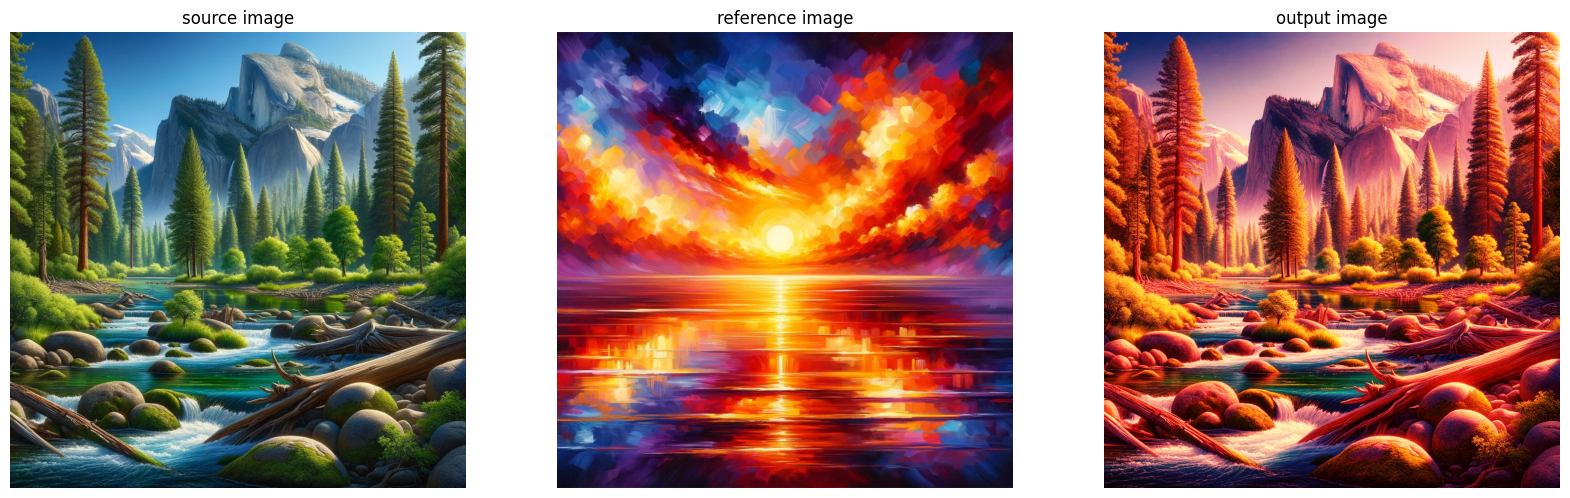

In [24]:
# Do not change this cell
src = cv2.imread('input.png')
ref = cv2.imread('ref.png')
Array = [src, ref, hist_matching(src,ref)]
titles = ['source image', 'reference image', 'output image']
plt.figure(figsize=(20,20))
for i in range(3):
  plt.subplot(1,3,i+1)
  plt.imshow(Array[i][:,:,::-1])
  plt.title(titles[i])
  plt.axis('off')

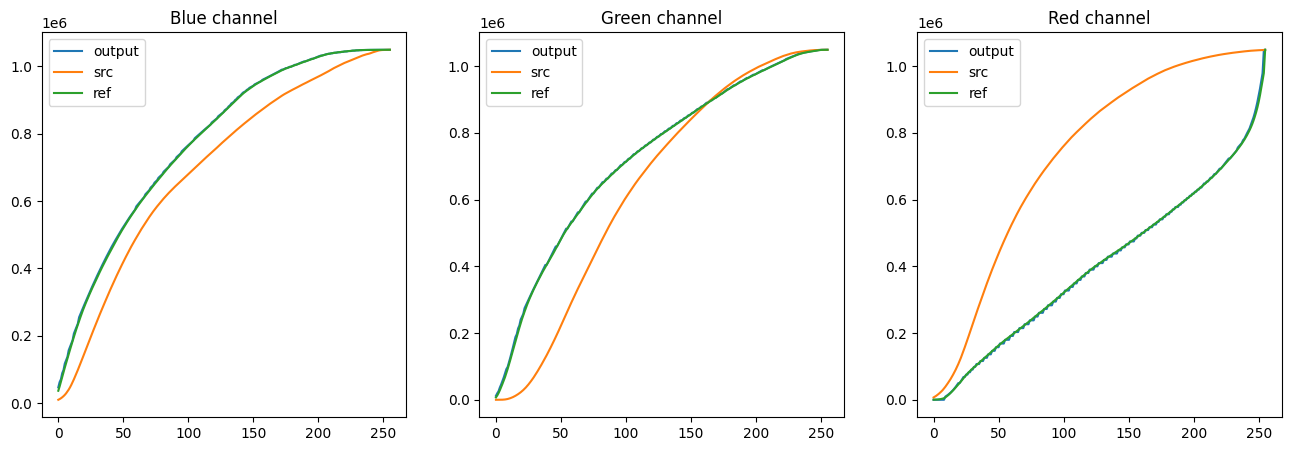

In [28]:
# Do not change this cell
fig = plt.figure(figsize= (16, 5))
channels = [(0, 'Blue channel'), (1, 'Green channel'), (2, 'Red channel')]
output = hist_matching(src,ref)
for channel, title in channels:
    fig.add_subplot(1, 3, channel+ 1)
    a = calc_cdf(output[:,:,channel])
    b = calc_cdf(src[:,:,channel])
    c = calc_cdf(ref[:,:,channel])
    plt.plot(a,label='output')
    plt.plot(b,label='src')
    plt.plot(c,label='ref')
    plt.legend()
    plt.title(title)